In [24]:
#1. 데이터를 분석하기 위해 파이썬 라이브러리를 import 하시고, 첨부한 엑셀파일을 로드 후 6개의 Sheet데이터를 병합하세요.
import pandas as pd
import numpy as np

#1-1.데이터 가져오기
hit11 = pd.read_excel('../data/sdata.xlsx', sheet_name ='2011')
hit12 = pd.read_excel('../data/sdata.xlsx', sheet_name ='2012')
hit13 = pd.read_excel('../data/sdata.xlsx', sheet_name ='2013')
hit14 = pd.read_excel('../data/sdata.xlsx', sheet_name ='2014')
hit15 = pd.read_excel('../data/sdata.xlsx', sheet_name ='2015')
hit16 = pd.read_excel('../data/sdata.xlsx', sheet_name ='2016')
hit14.head()

,REGDATE,HIT,KEYWORD
0,2014-01-01,8858,말;프르제발스키;에쿠스
1,2014-01-06,8522,김장;김치;발효
2,2014-01-08,8819,도청;무선인터넷;주파수;통화기록장치
3,2014-01-15,9740,겨울잠;아데노신;T1AM;각성
4,2014-01-22,12903,호르몬;에스트로겐;기초대사량;코르티솔


In [59]:
#1-2. 6개의 sheet를 한 데이터프레임에 합치기
hit = pd.concat([hit11, hit12, hit13, hit14, hit15, hit16])
hit.shape

(300, 3)

In [64]:
#1-3. 필요한 KEYWORD 컬럼만 가져오기
keyword = hit['KEYWORD']

In [30]:
#1-4. csv파일로 저장
keyword.to_csv('../data/keyword.csv')

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [56]:
#2. 주요 키워드를 분석하여 아래와 같은 Wordcloud를 생성하세요
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud, STOPWORDS
from konlpy.tag import Twitter

In [17]:
import platform
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False


if platform.system() =='Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).\
    get_name()
    rc('font', family = font_name)
else : 
    print('Unknown system...sorry~~~~')

In [66]:
#2-1. 1에서 저장한 csv파일 불러오기
text = open('../data/keyword.csv', encoding = 'utf-8').read()
text

'0,구제역; 침출수; 양수처리법; 반응벽\n1,사이버 포옹;사이버 커뮤니케이션;허기파자마\n2,원자력발전; 핵연료봉; 원자로; 노심; 사용후핵연료; 방사성 물질\n3,스파이;첩보원;마타하리 암호;제임스 본드;맥가이버 칼;스마트폰;정찰기;바퀴벌레;방사능\n4,곤충독;독;뱀;말벌;장수말벌\n5,백두산;화산;화산폭발;자연재해;음파;음파관측소\n6,슈퍼농산물; 식물유전자; ABCG40; AtABCC1; AtABCC2; AtTDX; ABR1; OSKAT; CBL\n7,LTE; 4세대 이동통신; 4G; 와이브로\n8,공룡;이;화석;DNA 분석\n9,마이야르;아미노산;환원당;향기;냄새\n10,인체 보형물;실리콘;고어텍스;보톡스;필러\n11,레이저;무통주사;약물전달시스템;자성나노캡슐;스마트 고분자;폴리피롤\n12,복사;프린터기;프린트;복사기;형광;형광펜\n13,노화;무성생식;해파리;투리토프시스 누트리쿨라;텔로미어;텔로머라아제\n14,뇌;두뇌;대뇌피질\n15,휴대전화;전자파;신경교종\n16,자외선;광노화;피하지방;주름\n17,TV;텔레비전;스마트 TV;3D TV;편광 안경;셔터 안경\n18,선글라스;자외선 차단; 편광\n19,손;세균;황색포도상구균;손세정제;손소독제\n20,과학이론;낙하속도;열질량이론;관성;\n21,박쥐;비행;털;비막;초음파;TRPV1\n22,윈드시어;바람;비행;양력\n23,톈궁 1호;우주정거장;우주발사체\n24,부탄가스;압력밥솥;기화열\n25,로봇;자폐성 장애;인터랙션 사이언스;캐스퍼;키폰;패로\n26,남성호르몬;CAH;선천성부신과형성증;안드로겐\n27,노벨상;초신성;암흑에너지;빅뱅;준결정\n28,이그노벨상;와사비;원반던지기;하품\n29,거미;거미줄;생체모방;극세사\n30,심해생물;심해아귀;집낙지;번식;번식 전략\n31,수염;털;고양이;바다표범;볏\n32,발명;특허;아이스크림콘;삼각팬티;일회용 밴드;옷핀\n33,뇌;심리학;시간;하루주기성 시계;시간간격 시계\n34,가습;가습기;습도\n35,백색소음;백색음;소음\n0,용;흑룡;2012년\n1,우주식품;우주음식

In [35]:
#2-2. 트위터 모듈로 명사만 가져오기
t = Twitter()
tokens_text = t.nouns(text)
tokens_text

C:\Users\a\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['구제역',
 '침출수',
 '수처리',
 '법',
 '반응',
 '벽',
 '사이버',
 '포옹',
 '사이버',
 '커뮤니케이션',
 '허기',
 '파자마',
 '원자력발전',
 '핵연료',
 '봉',
 '원자로',
 '노심',
 '사용',
 '후',
 '핵연료',
 '방사성',
 '물질',
 '스파이',
 '첩보원',
 '마타하리',
 '암호',
 '제임스',
 '본드',
 '맥가이버',
 '칼',
 '스마트폰',
 '정찰기',
 '바퀴벌레',
 '방사',
 '능',
 '곤충',
 '독',
 '독',
 '뱀',
 '말벌',
 '장수말벌',
 '백두산',
 '화산',
 '화산폭발',
 '자연재해',
 '음파',
 '음파',
 '관측',
 '소',
 '슈퍼',
 '농산물',
 '식물',
 '유전자',
 '세대',
 '이동통신',
 '와이브로',
 '공룡',
 '이',
 '화석',
 '분석',
 '마이',
 '르',
 '아미노산',
 '환원당',
 '향기',
 '냄새',
 '인체',
 '보',
 '물',
 '실리콘',
 '고어텍스',
 '보톡스',
 '필러',
 '레이저',
 '무통',
 '주사',
 '약물',
 '전달',
 '시스템',
 '자성',
 '나노',
 '캡슐',
 '스마트',
 '고분자',
 '폴리',
 '피롤',
 '복사',
 '프린터기',
 '프린트',
 '복사기',
 '형광',
 '형광',
 '펜',
 '노화',
 '무성생식',
 '해파리',
 '투리토프',
 '시스',
 '누',
 '트리',
 '쿨',
 '텔로미어',
 '텔로머라아제',
 '뇌',
 '두뇌',
 '대뇌피질',
 '휴대전화',
 '전자파',
 '신경',
 '교종',
 '자외선',
 '광',
 '노화',
 '피하지방',
 '주름',
 '텔레비전',
 '스마트',
 '편광',
 '안경',
 '셔터',
 '안경',
 '선글라스',
 '자외선',
 '차단',
 '편광',
 '손',
 '세균',
 '황색포도상구균',
 '손세정제',
 '손소독제',
 '과학',
 '이론',
 '낙하'

In [47]:
#2-3.텍스트의 길이, 빈도 구하기
text = nltk.Text(tokens_text)
print(len(text))
print(len(set(text)))
text.vocab()

1734
1312


FreqDist({'구제역': 1,
          '침출수': 1,
          '수처리': 1,
          '법': 5,
          '반응': 1,
          '벽': 1,
          '사이버': 2,
          '포옹': 1,
          '커뮤니케이션': 1,
          '허기': 1,
          '파자마': 1,
          '원자력발전': 1,
          '핵연료': 2,
          '봉': 1,
          '원자로': 1,
          '노심': 1,
          '사용': 1,
          '후': 1,
          '방사성': 2,
          '물질': 4,
          '스파이': 1,
          '첩보원': 1,
          '마타하리': 1,
          '암호': 1,
          '제임스': 2,
          '본드': 1,
          '맥가이버': 1,
          '칼': 1,
          '스마트폰': 4,
          '정찰기': 1,
          '바퀴벌레': 2,
          '방사': 3,
          '능': 1,
          '곤충': 2,
          '독': 2,
          '뱀': 1,
          '말벌': 2,
          '장수말벌': 1,
          '백두산': 2,
          '화산': 3,
          '화산폭발': 1,
          '자연재해': 1,
          '음파': 2,
          '관측': 1,
          '소': 1,
          '슈퍼': 2,
          '농산물': 1,
          '식물': 4,
          '유전자': 8,
          '세대': 1,
          '이동통신': 1,
  

In [50]:
#2-4. 불용어 처리
stop_words = ['봉', '후', '능', '이', '르', '보', '린', '호', '증', '누', '패', '제']
ko1 = [each_word for each_word in text if each_word not in stop_words]
ko1

['구제역',
 '침출수',
 '수처리',
 '법',
 '반응',
 '벽',
 '사이버',
 '포옹',
 '사이버',
 '커뮤니케이션',
 '허기',
 '파자마',
 '원자력발전',
 '핵연료',
 '원자로',
 '노심',
 '사용',
 '핵연료',
 '방사성',
 '물질',
 '스파이',
 '첩보원',
 '마타하리',
 '암호',
 '제임스',
 '본드',
 '맥가이버',
 '칼',
 '스마트폰',
 '정찰기',
 '바퀴벌레',
 '방사',
 '곤충',
 '독',
 '독',
 '뱀',
 '말벌',
 '장수말벌',
 '백두산',
 '화산',
 '화산폭발',
 '자연재해',
 '음파',
 '음파',
 '관측',
 '소',
 '슈퍼',
 '농산물',
 '식물',
 '유전자',
 '세대',
 '이동통신',
 '와이브로',
 '공룡',
 '화석',
 '분석',
 '마이',
 '아미노산',
 '환원당',
 '향기',
 '냄새',
 '인체',
 '물',
 '실리콘',
 '고어텍스',
 '보톡스',
 '필러',
 '레이저',
 '무통',
 '주사',
 '약물',
 '전달',
 '시스템',
 '자성',
 '나노',
 '캡슐',
 '스마트',
 '고분자',
 '폴리',
 '피롤',
 '복사',
 '프린터기',
 '프린트',
 '복사기',
 '형광',
 '형광',
 '펜',
 '노화',
 '무성생식',
 '해파리',
 '투리토프',
 '시스',
 '트리',
 '쿨',
 '텔로미어',
 '텔로머라아제',
 '뇌',
 '두뇌',
 '대뇌피질',
 '휴대전화',
 '전자파',
 '신경',
 '교종',
 '자외선',
 '광',
 '노화',
 '피하지방',
 '주름',
 '텔레비전',
 '스마트',
 '편광',
 '안경',
 '셔터',
 '안경',
 '선글라스',
 '자외선',
 '차단',
 '편광',
 '손',
 '세균',
 '황색포도상구균',
 '손세정제',
 '손소독제',
 '과학',
 '이론',
 '낙하',
 '속도',
 '질량',
 '이론',
 '관성',
 '박쥐',
 '비행'

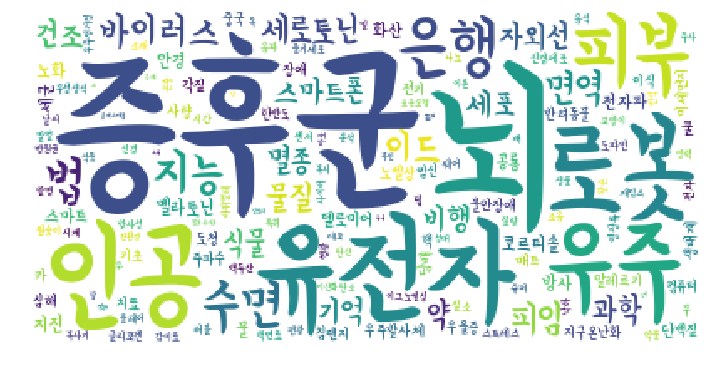

In [57]:
#2-5. Wordcloud 그리기
data = ko1.vocab().most_common(150)
wordcloud = WordCloud(font_path = 'c:/Windows/Fonts/BMYEONSUNG_ttf.ttf',
                     relative_scaling = 0.2,
                     background_color = 'white',
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

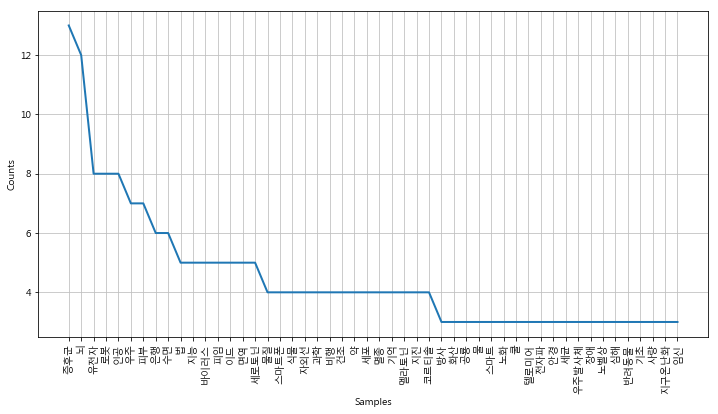

In [51]:
#3. 자주 등장한 단어의 빈도 그래프로 출력하세요.
ko1 = nltk.Text(ko1)
plt.figure(figsize = (12, 6))
ko1.plot(50)
plt.show()

In [ ]:
#4. 위의 자연어 처리 절차에 대해 간략하게 설명하세요
#1.분석하고자 하는 텍스트 가져오기
#2.전처리 : 필요없는 요소를 제외하고 분석하고자 하는 텍스트만 하나로 모으기
#3.토큰화 : nltk, KoLNpy 모듈을 이용해 해당 텍스트를 명사나 형태소 단위로 추출
#4.불용어 처리 : 자주 나오지만 특별한 의미가 없는 단어들을 제외
#5.시각화 :그래프나 워드클라우드로 시각화